In [ ]:
pip install sklearn


In [ ]:
pip install pandas



In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/dadosspam.csv')

In [ ]:
df.head() 

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1


In [ ]:
x = df.drop('spam',axis=1) 
y = df['spam'] 

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_prev = model.predict(x_test)
y_prev

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
acc = accuracy_score(y_test,y_prev)
prec = precision_score(y_test,y_prev)
f1score = f1_score(y_test,y_prev)
print(f'Acurácia:{acc}')
print(f'Precisao: {prec}')
print(f'f1_score:{f1score}')

Acurácia:0.9866666666666667
Precisao: 1.0
f1_score:0.9865771812080537


In [ ]:
cm = confusion_matrix(y_test,y_prev)
cm

array([[149,   0],
       [  4, 147]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'Previsão')

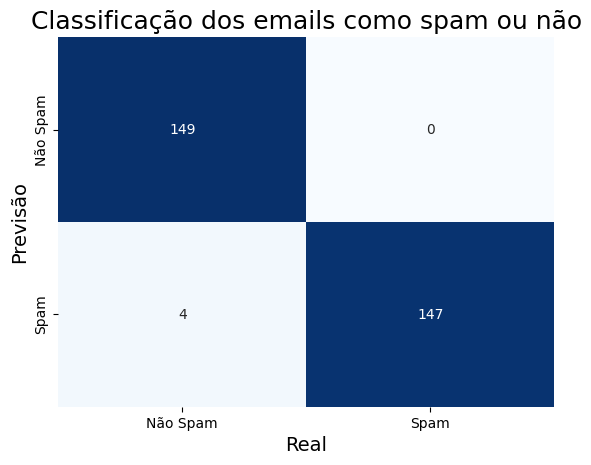

In [38]:
sns.heatmap(cm, annot= True, fmt = 'd',cmap='Blues',cbar=False, xticklabels=['Não Spam', 'Spam'],yticklabels=['Não Spam','Spam'])
plt.title('Classificação dos emails como spam ou não',fontsize= 18)
plt.xlabel('Real',fontsize=14)
plt.ylabel('Previsão',fontsize =14)

In [ ]:
spam_count = sum(y_prev)
non_spam_count = len (y_prev) - spam_count
print(f'Spam: {spam_count}')
print(f'Não Spam:{non_spam_count}')

Spam: 147
Não Spam:153


In [ ]:
plt.Figure(figsize=(8,6))
cor = ['blue','red']
sns.barplot(x=['Não Spam','Spam'],y = [non_spam_count,spam_count],palette=cor, legend= False)
plt.xlabel('Categoria')
plt.ylabel('Número de mensagens')
plt.title('Classificação de mensagens como Spam ou Não Spam')
plt.grid(False)